2025-05-20 11:30:36.232278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747740636.247220      32 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747740636.251726      32 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747740636.263102      32 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747740636.263115      32 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747740636.263116      32 computation_placer.cc:177] computation placer alr

TensorFlow Version: 2.19.0
GPUs Available: []


W0000 00:00:1747740638.372233      32 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step
Training samples: 60000
Testing samples: 10000
Number of classes: 10
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8469 - loss: 0.4754 - val_accuracy: 0.9842 - val_loss: 0.0506
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9788 - loss: 0.0711 - val_accuracy: 0.9898 - val_loss: 0.0314
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9870 - loss: 0.0468 - val_accuracy: 0.9909 - val_loss: 0.0278
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9926 - val_loss: 0.0249
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9912 - loss: 0.0288 - val_accuracy: 0.9933 - val_loss: 0.0246
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9927 - loss: 0.0248 - val_accuracy: 0.9921 - val_loss: 0.0241
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accur

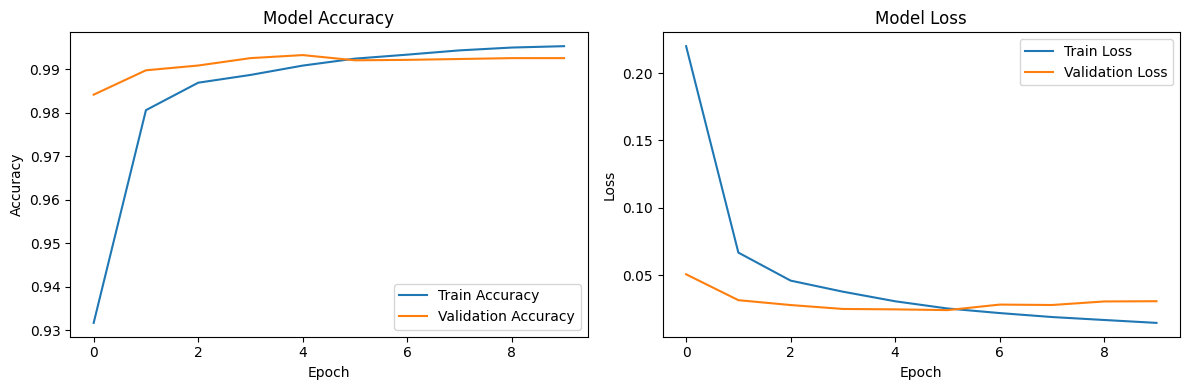

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0410 
Test Accuracy: 0.9926
Test Loss: 0.0307


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
import matplotlib.pyplot as plt

# Verify GPU
print("TensorFlow Version:", tf.__version__)
print("GPUs Available:", tf.config.list_physical_devices('GPU'))
if not tf.config.list_physical_devices('GPU'):
    print("WARNING: No GPU detected. Training on CPU.")

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(f"Training samples: {x_train.shape[0]}")
print(f"Testing samples: {x_test.shape[0]}")
print(f"Number of classes: 10")

# Build CNN model
with tf.device('/GPU:0'):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='#1f77b4')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#ff7f0e')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('/tf/project/mnist_training_plot.png')
plt.show()

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Save model in Keras format
model.save('/tf/project/mnist_digit_model.keras')